# **Music**: SpotifyTopSongs
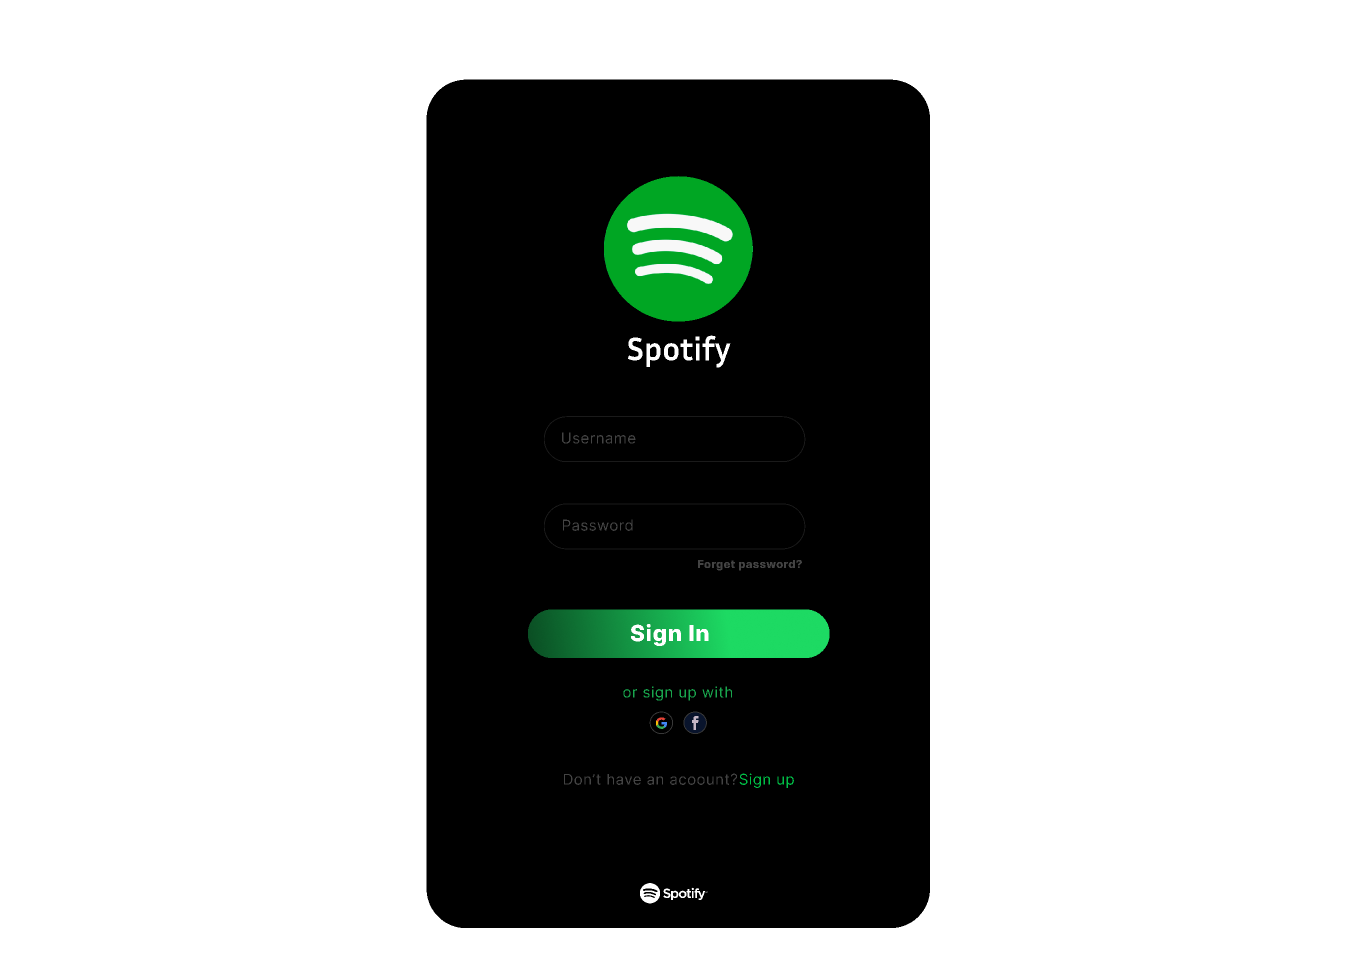

My project revolves around analyzing a dataset containing information about music tracks, including artist names, track titles, and attributes like tempo and danceability. I aim to uncover trends, predict track popularity, and explore factors affecting chart performance. Additionally, I'll investigate how collaborations between artists and the influence of record labels impact track success.Ultimately, I hope to gain insights that benefit artists, record labels, and music lovers everywhere.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd , numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
df = pd.read_csv("/content/drive/MyDrive/spotify_top_songs_audio_features.csv")
df


,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
0,000xQL6tZNLJzIrtIgxqSl,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,0.0639,0.13100,0.000000,0.0852,0.524,-6.029,120.963,188491,17,107527761
1,003eoIwxETJujVWmNFMoZy,Alessia Cara,Growing Pains,Def Jam Recordings,C#/Db,Minor,4 beats,0.353,0.755,0.7330,0.08220,0.000000,0.3900,0.437,-6.276,191.153,193680,2,9944865
2,003vvx7Niy0yvhvHt4a68B,The Killers,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,0.0747,0.00121,0.000000,0.0995,0.236,-5.230,148.033,222973,125,512388123
3,00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,0.5530,0.28700,0.000000,0.3140,0.665,-7.438,167.911,284856,2,11985346
4,00Blm7zeNqgYLPtW6zg8cj,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,0.0530,0.03610,0.000000,0.0755,0.688,-4.806,97.014,193507,30,301860377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,7zgqtptZvhf8GEmdsM2vp2,Taylor Swift,...Ready For It?,"Big Machine Records, LLC",D,Major,4 beats,0.615,0.779,0.1350,0.06650,0.000000,0.1550,0.453,-6.454,160.000,208198,1,17583532
6509,7zjEyeBsaw9gV0jofJLfOM,"Young Thug, A$AP Rocky, Post Malone",Livin It Up (with Post Malone & A$AP Rocky),300 Entertainment/Atl,G,Major,4 beats,0.767,0.313,0.0798,0.83800,0.000000,0.1050,0.765,-12.059,82.582,210907,2,10526635
6510,7zl7kehxesNEo2pYkKXTSe,"Eminem, Jack Harlow, Cordae",Killer (feat. Jack Harlow & Cordae) - Remix,Shady/Aftermath/Interscope Records,B,Minor,4 beats,0.924,0.730,0.2740,0.05250,0.000000,0.1130,0.848,-6.125,99.010,236666,1,5404939
6511,7zvfDihYiJ8RQ1nRcpKBF5,"Kendrick Lamar, Tanna Leone",Mr. Morale,pgLang/Top Dawg Entertainment/Aftermath/Inters...,A,Major,3 beats,0.727,0.530,0.3120,0.28300,0.000028,0.3920,0.258,-8.616,174.025,210841,1,12872010


## ***Stage-1***

In [ ]:
# using df.dtypes

df.dtypes

id                   object
artist_names         object
track_name           object
source               object
key                  object
mode                 object
time_signature       object
danceability        float64
energy              float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
loudness            float64
tempo               float64
duration_ms           int64
weeks_on_chart        int64
streams               int64
dtype: object

In [ ]:
# using head

df.head(11)

,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
0,000xQL6tZNLJzIrtIgxqSl,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,0.0639,0.13100,0.000000,0.0852,0.524,-6.029,120.963,188491,17,107527761
1,003eoIwxETJujVWmNFMoZy,Alessia Cara,Growing Pains,Def Jam Recordings,C#/Db,Minor,4 beats,0.353,0.755,0.7330,0.08220,0.000000,0.3900,0.437,-6.276,191.153,193680,2,9944865
2,003vvx7Niy0yvhvHt4a68B,The Killers,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,0.0747,0.00121,0.000000,0.0995,0.236,-5.230,148.033,222973,125,512388123
3,00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,0.5530,0.28700,0.000000,0.3140,0.665,-7.438,167.911,284856,2,11985346
4,00Blm7zeNqgYLPtW6zg8cj,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,0.0530,0.03610,0.000000,0.0755,0.688,-4.806,97.014,193507,30,301860377
5,00EPIEnX1JFjff8sC6bccd,"Thalia, NATTI NATASHA",No Me Acuerdo,Sony Music Latin,G,Minor,4 beats,0.836,0.799,0.0873,0.18700,0.000000,0.0920,0.772,-4.247,94.033,217653,16,98123727
6,00ETaeHUQ6lops3oWU1Wrt,"Kygo, Donna Summer",Hot Stuff,RCA Records Label,F,Major,4 beats,0.681,0.773,0.1480,0.01900,0.000001,0.1100,0.429,-5.749,119.961,199008,1,4569978
7,00ZKeP47bZtswtANkvxz2j,"Tropa do Bruxo, DJ Ws da Igrejinha, SMU, Triz,...",Baile do Bruxo,Tropa Do Bruxo,G,Minor,5 beats,0.734,0.228,0.5300,0.88900,0.006420,0.1020,0.522,-4.731,162.524,221538,3,27916960
8,00gpGR84M27moP7AFuqHIx,YBN Nahmir,Bounce Out With That,2018,G#/Ab,Major,4 beats,0.857,0.560,0.1730,0.04260,0.000000,0.1530,0.482,-8.278,94.949,91011,6,4913180
9,00imgaPlYRrMGn9o83hfmk,Brent Faiyaz,LOOSE CHANGE,"Lost Kids LLC., Marketed by Venice / Stem",C#/Db,Minor,4 beats,0.574,0.369,0.0814,0.75300,0.000000,0.1470,0.440,-8.931,84.975,226011,1,5854629


In [ ]:
# using describe

df.describe()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
count,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6.513000e+03
mean,0.681731,0.636522,0.121933,0.236761,0.012469,0.180168,0.492412,-6.350667,122.117244,202566.684170,13.614924,1.089647e+08
std,0.141787,0.164813,0.113441,0.244784,0.075151,0.138054,0.227001,2.536114,29.416097,49199.592333,24.084051,2.276695e+08
min,0.150000,0.021800,0.023200,0.000008,0.000000,0.019700,0.032000,-34.475000,46.718000,30133.000000,1.000000,2.525159e+06
25%,0.591000,0.534000,0.044000,0.044400,0.000000,0.097400,0.316000,-7.564000,98.007000,173038.000000,1.000000,8.695060e+06
50%,0.698000,0.651000,0.072200,0.145000,0.000000,0.124000,0.489000,-5.983000,120.034000,198367.000000,4.000000,2.712856e+07
75%,0.785000,0.759000,0.163000,0.356000,0.000041,0.219000,0.669000,-4.673000,142.025000,226003.000000,16.000000,9.951456e+07
max,0.985000,0.989000,0.966000,0.994000,0.953000,0.977000,0.982000,1.509000,212.117000,690732.000000,367.000000,3.528450e+09


# ***Stage-2***

In [ ]:
#Converting columns to the correct data types:

df['tempo'] = df['tempo'].astype(int)
df['duration_ms'] = pd.to_numeric(df['duration_ms'])
df['mode'] = df['mode'].astype('category')
df['key'] = df['key'].astype('category')
df


,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
0,000xQL6tZNLJzIrtIgxqSl,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,0.0639,0.13100,0.000000,0.0852,0.524,-6.029,120,188491,17,107527761
1,003eoIwxETJujVWmNFMoZy,Alessia Cara,Growing Pains,Def Jam Recordings,C#/Db,Minor,4 beats,0.353,0.755,0.7330,0.08220,0.000000,0.3900,0.437,-6.276,191,193680,2,9944865
2,003vvx7Niy0yvhvHt4a68B,The Killers,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,0.0747,0.00121,0.000000,0.0995,0.236,-5.230,148,222973,125,512388123
3,00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,0.5530,0.28700,0.000000,0.3140,0.665,-7.438,167,284856,2,11985346
4,00Blm7zeNqgYLPtW6zg8cj,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,0.0530,0.03610,0.000000,0.0755,0.688,-4.806,97,193507,30,301860377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,7zgqtptZvhf8GEmdsM2vp2,Taylor Swift,...Ready For It?,"Big Machine Records, LLC",D,Major,4 beats,0.615,0.779,0.1350,0.06650,0.000000,0.1550,0.453,-6.454,160,208198,1,17583532
6509,7zjEyeBsaw9gV0jofJLfOM,"Young Thug, A$AP Rocky, Post Malone",Livin It Up (with Post Malone & A$AP Rocky),300 Entertainment/Atl,G,Major,4 beats,0.767,0.313,0.0798,0.83800,0.000000,0.1050,0.765,-12.059,82,210907,2,10526635
6510,7zl7kehxesNEo2pYkKXTSe,"Eminem, Jack Harlow, Cordae",Killer (feat. Jack Harlow & Cordae) - Remix,Shady/Aftermath/Interscope Records,B,Minor,4 beats,0.924,0.730,0.2740,0.05250,0.000000,0.1130,0.848,-6.125,99,236666,1,5404939
6511,7zvfDihYiJ8RQ1nRcpKBF5,"Kendrick Lamar, Tanna Leone",Mr. Morale,pgLang/Top Dawg Entertainment/Aftermath/Inters...,A,Major,3 beats,0.727,0.530,0.3120,0.28300,0.000028,0.3920,0.258,-8.616,174,210841,1,12872010


In [ ]:
df.dtypes

id                    object
artist_names          object
track_name            object
source                object
key                 category
mode                category
time_signature        object
danceability         float64
energy               float64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
loudness             float64
tempo                  int64
duration_ms            int64
weeks_on_chart         int64
streams                int64
dtype: object

Basically danceability represents how suitable a track is for dancing based on a combination of musical element whereas, energy represents the track level which typically characterized by factors such as loudness and dynamic range. By adding the new column total_energy represents the combined energy level of each track, considering its danceability and overall energy. By adding the the 'danceability' and 'energy' columns together, it produces a single rhythm that provides deep understanding of the overall energy of the track.

In [ ]:
# Adding a new column 'total_energy' by adding 'danceability' and 'energy'

df['total_energy'] = df['danceability'] + df['energy']
df.head(10)

,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams,total_energy
0,000xQL6tZNLJzIrtIgxqSl,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,0.0639,0.13100,0.000000,0.0852,0.524,-6.029,120,188491,17,107527761,1.375
1,003eoIwxETJujVWmNFMoZy,Alessia Cara,Growing Pains,Def Jam Recordings,C#/Db,Minor,4 beats,0.353,0.755,0.7330,0.08220,0.000000,0.3900,0.437,-6.276,191,193680,2,9944865,1.108
2,003vvx7Niy0yvhvHt4a68B,The Killers,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,0.0747,0.00121,0.000000,0.0995,0.236,-5.230,148,222973,125,512388123,1.263
3,00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,0.5530,0.28700,0.000000,0.3140,0.665,-7.438,167,284856,2,11985346,1.245
4,00Blm7zeNqgYLPtW6zg8cj,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,0.0530,0.03610,0.000000,0.0755,0.688,-4.806,97,193507,30,301860377,1.468
5,00EPIEnX1JFjff8sC6bccd,"Thalia, NATTI NATASHA",No Me Acuerdo,Sony Music Latin,G,Minor,4 beats,0.836,0.799,0.0873,0.18700,0.000000,0.0920,0.772,-4.247,94,217653,16,98123727,1.635
6,00ETaeHUQ6lops3oWU1Wrt,"Kygo, Donna Summer",Hot Stuff,RCA Records Label,F,Major,4 beats,0.681,0.773,0.1480,0.01900,0.000001,0.1100,0.429,-5.749,119,199008,1,4569978,1.454
7,00ZKeP47bZtswtANkvxz2j,"Tropa do Bruxo, DJ Ws da Igrejinha, SMU, Triz,...",Baile do Bruxo,Tropa Do Bruxo,G,Minor,5 beats,0.734,0.228,0.5300,0.88900,0.006420,0.1020,0.522,-4.731,162,221538,3,27916960,0.962
8,00gpGR84M27moP7AFuqHIx,YBN Nahmir,Bounce Out With That,2018,G#/Ab,Major,4 beats,0.857,0.560,0.1730,0.04260,0.000000,0.1530,0.482,-8.278,94,91011,6,4913180,1.417
9,00imgaPlYRrMGn9o83hfmk,Brent Faiyaz,LOOSE CHANGE,"Lost Kids LLC., Marketed by Venice / Stem",C#/Db,Minor,4 beats,0.574,0.369,0.0814,0.75300,0.000000,0.1470,0.440,-8.931,84,226011,1,5854629,0.943


Basically, this column will insights into the average popularity of each track over the duration it remained on the chart. Which will help in comparing the relative popularity of different tracks, considering both their streaming numbers and the duration they spent on the chart.

In [ ]:
#Creating a new column 'popularity_ratio'

df['popularity_ratio'] = (df['streams'] / df['weeks_on_chart']).round(2)

df.head()

,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,...,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams,total_energy,popularity_ratio
0,000xQL6tZNLJzIrtIgxqSl,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,0.0639,...,0.0,0.0852,0.524,-6.029,120,188491,17,107527761,1.375,6325162.41
1,003eoIwxETJujVWmNFMoZy,Alessia Cara,Growing Pains,Def Jam Recordings,C#/Db,Minor,4 beats,0.353,0.755,0.7330,...,0.0,0.3900,0.437,-6.276,191,193680,2,9944865,1.108,4972432.50
2,003vvx7Niy0yvhvHt4a68B,The Killers,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,0.0747,...,0.0,0.0995,0.236,-5.230,148,222973,125,512388123,1.263,4099104.98
3,00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,0.5530,...,0.0,0.3140,0.665,-7.438,167,284856,2,11985346,1.245,5992673.00
4,00Blm7zeNqgYLPtW6zg8cj,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,0.0530,...,0.0,0.0755,0.688,-4.806,97,193507,30,301860377,1.468,10062012.57


It's selecting the tracks by by Taylor Swift with 'Love' in the title, providing insights into her romantic-themed songs.

In [ ]:
#Filtering using string and string condition:

filtered_df = df[df['artist_names'].str.contains('Taylor Swift') & df['track_name'].str.contains('Love')]
filtered_df

,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
520,0bzbvANY6oETSJLc0wlVGY,Taylor Swift,Lover,Taylor Swift,G,Major,4 beats,0.359,0.543,0.0915,0.4920,0.000016,0.1180,0.4530,-7.582,68.504,221307,1,19675126
826,0zo975x58DlXbZllWvfYhg,Taylor Swift,When Emma Falls in Love (Taylor’s Version) (Fr...,Taylor Swift,D,Major,4 beats,0.474,0.763,0.0505,0.1590,0.000000,0.1380,0.2310,-4.632,78.133,252386,1,16282905
1340,1dGr1c8CrMLDpV6mPbImSI,Taylor Swift,Lover,Taylor Swift,G,Major,4 beats,0.359,0.543,0.0919,0.4920,0.000016,0.1180,0.4530,-7.582,68.534,221307,58,637369229
1680,22bPsP2jCgbLUvh82U0Z3M,Taylor Swift,The Way I Loved You (Taylor’s Version),Taylor Swift,F,Major,4 beats,0.402,0.732,0.0484,0.0033,0.000000,0.1080,0.4720,-4.665,161.032,243137,1,7736262
2699,3CeCwYWvdfXbZLXFhBrbnf,Taylor Swift,Love Story (Taylor’s Version),Taylor Swift,D,Major,4 beats,0.626,0.790,0.0311,0.1350,0.000004,0.0989,0.4160,-4.302,119.082,235767,3,32518830
3119,3i9UVldZOE0aD0JnyfAZZ0,"Taylor Swift, Shawn Mendes",Lover (Remix) [feat. Shawn Mendes],Taylor Swift,G,Major,3 beats,0.448,0.603,0.0640,0.4330,0.000000,0.0862,0.4220,-7.176,205.272,221307,6,42669291
3672,4P9Q0GojKVXpRTJCaL3kyy,Taylor Swift,All Of The Girls You Loved Before,Taylor Swift,D,Major,3 beats,0.718,0.467,0.0398,0.7070,0.000069,0.1260,0.3960,-9.660,95.960,221407,11,133453137
3763,4UwqOWDpdeIDVQDuKT6iza,Taylor Swift,You Are In Love (Taylor's Version),Taylor Swift,A,Major,4 beats,0.537,0.495,0.0573,0.6090,0.000002,0.1120,0.4920,-9.416,84.948,267389,1,17510330
3870,4d1CG5ei1E2vGbvmgf5KKv,Taylor Swift,This Love (Taylor’s Version),Taylor Swift,E,Major,4 beats,0.470,0.494,0.0349,0.3020,0.000000,0.0672,0.0524,-8.672,144.039,250100,2,18825081
4558,5QVVjX0ZItqlVpEuVCM9Yg,Taylor Swift,This Love (Taylor’s Version),Taylor Swift,C#/Db,Minor,4 beats,0.474,0.511,0.0339,0.2990,0.000000,0.0673,0.0586,-8.766,144.022,250100,3,18373922


In [ ]:
#Filtering songs that only have a "key [A]"

songs_A = df[df['key'] == 'A']

songs_A

,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,...,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams,total_energy,popularity_ratio
3,00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,0.5530,...,0.000000,0.3140,0.665,-7.438,167,284856,2,11985346,1.245,5992673.00
10,00ko9WaS4jOX1kEk3gvHjf,"Chance the Rapper, MadeinTYO, DaBaby",Hot Shower,Chance the Rapper,A,Major,4 beats,0.899,0.509,0.3870,...,0.000000,0.0573,0.599,-8.040,150,225924,4,22273873,1.408,5568468.25
15,01DOm09B2AbiTARAbXVI6g,"ScHoolboy Q, Travis Scott",CHopstix (feat. Travis Scott),Top Dawg Entertainment/Interscope Records,A,Minor,4 beats,0.958,0.600,0.1180,...,0.000000,0.2740,0.607,-6.996,127,181153,2,11037789,1.558,5518894.50
28,020wG4EHTwBy5h2rbpxqvK,"Marracash, thasup, Sfera Ebbasta",SUPREME - L'ego,Universal Music Italia srL.,A,Major,4 beats,0.656,0.661,0.0602,...,0.000000,0.1250,0.509,-5.888,140,223045,2,10401867,1.317,5200933.50
37,02itaCXOdC54J0ISjqqFAp,"R3HAB, A Touch Of Class",All Around The World (La La La),Virgin,A,Minor,4 beats,0.733,0.859,0.0330,...,0.064500,0.1050,0.520,-5.030,124,147840,15,104395994,1.592,6959732.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6476,7xLYLM5K6S1TwiSdfuhZQg,"Gera MX, Rels B",Se Me Olvidó,Gerardo Daniel Torres Montante,A,Minor,4 beats,0.788,0.526,0.0710,...,0.000000,0.2850,0.584,-8.082,89,220301,1,5655126,1.314,5655126.00
6490,7yHEDfrJNd0zWOfXwydNH0,Ariana Grande,Into You,Universal Records,A,Major,4 beats,0.636,0.727,0.1060,...,0.000001,0.1510,0.358,-5.852,107,244453,16,57686435,1.363,3605402.19
6496,7ygVaACDENw4PgLbN1awFE,Apache 207,Matrix,Four Music Local,A,Minor,4 beats,0.789,0.509,0.2910,...,0.000003,0.2720,0.418,-8.766,114,183793,1,5724739,1.298,5724739.00
6504,7zBscbZUCr4jEABrfV9g03,Joji,Before The Day Is Over,88rising Music/Warner Records,A,Major,4 beats,0.393,0.305,0.0461,...,0.001460,0.0920,0.150,-11.372,160,213707,1,8440433,0.698,8440433.00


The source column from from 'Universal Records', providing insights into tracks associated with this specific record label.

In [ ]:
songs_Source = df[df['source'] == 'Universal Records']

songs_Source

,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,...,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams,total_energy,popularity_ratio
635,0lizgQ7Qw35od7CYaoMBZb,Ariana Grande,Santa Tell Me,Universal Records,G,Major,4 beats,0.525,0.621,0.1160,...,0.000000,0.2940,0.591,-7.364,191,204093,44,739716586,1.146,16811740.59
882,13HVjjWUZFaWilh2QUJKsP,James Bay,Let It Go,Universal Records,C#/Db,Major,4 beats,0.546,0.311,0.0288,...,0.000017,0.1070,0.246,-10.396,147,260533,11,35758685,0.857,3250789.55
973,1ADjWm8QNhgNV8yCNNgQ1T,Ariana Grande,Santa Tell Me,Universal Records,G,Major,5 beats,0.464,0.630,0.1820,...,0.000000,0.2950,0.527,-7.337,132,204093,6,45923474,1.094,7653912.33
2331,2mfUa8bLs2s5N4VaqJZ4lZ,Hailee Steinfeld,Most Girls,Universal Records,A,Major,4 beats,0.755,0.570,0.0888,...,0.000000,0.0891,0.406,-7.132,102,204400,30,177022418,1.325,5900747.27
2743,3FiE2d325mIOc4YjkSLVJR,"Ariana Grande, Future",Everyday,Universal Records,G,Minor,4 beats,0.635,0.738,0.0519,...,0.000000,0.1500,0.428,-4.424,130,194840,9,42879301,1.373,4764366.78
2823,3KkXRkHbMCARz0aVfEt68P,"Post Malone, Swae Lee",Sunflower - Spider-Man: Into the Spider-Verse,Universal Records,D,Major,4 beats,0.760,0.479,0.0466,...,0.000000,0.0703,0.913,-5.574,89,158040,46,786652132,1.239,17101133.30
3021,3a1lNhkSLSkpJE4MSHpDu9,"Post Malone, Quavo",Congratulations,Universal Records,F#/Gb,Major,4 beats,0.630,0.804,0.0363,...,0.000000,0.2530,0.492,-4.183,123,220293,127,988054874,1.434,7779959.64
3764,4Uy3kNxW2kB8AEoXljEcth,"Nicki Minaj, Anuel AA, Bantu","Familia (with Anuel Aa, feat. Bantu) - Spider-...",Universal Records,A,Minor,5 beats,0.766,0.881,0.1370,...,0.000002,0.3470,0.674,-5.158,112,174893,6,33350812,1.647,5558468.67
4054,4pLwZjInHj3SimIyN9SnOz,"Ariana Grande, Nicki Minaj",Side To Side,Universal Records,F#/Gb,Minor,4 beats,0.648,0.738,0.2470,...,0.000000,0.2920,0.603,-5.883,159,226160,39,239180111,1.386,6132823.36
4356,5AEtlRudpgdT5FtNiuly6Y,"Hailee Steinfeld, Alesso, Florida Georgia Line...","Let Me Go (with Alesso, Florida Georgia Line &...",Universal Records,G#/Ab,Major,4 beats,0.659,0.717,0.0581,...,0.000000,0.0769,0.710,-4.202,103,174800,38,382889819,1.376,10076047.87


I used 'artist_names' column as the index as it allows the direct access to tracks sung by artist names.

In [ ]:
#Setting 'artist_names' column as the new index
df.set_index('artist_names', inplace=True)
df

,id,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams,total_energy,popularity_ratio
artist_names,,,,,,,,,,,,,,,,,,,,
"ZAYN, PARTYNEXTDOOR",000xQL6tZNLJzIrtIgxqSl,Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,0.0639,0.13100,0.000000,0.0852,0.524,-6.029,120,188491,17,107527761,1.375,6325162.41
Alessia Cara,003eoIwxETJujVWmNFMoZy,Growing Pains,Def Jam Recordings,C#/Db,Minor,4 beats,0.353,0.755,0.7330,0.08220,0.000000,0.3900,0.437,-6.276,191,193680,2,9944865,1.108,4972432.50
The Killers,003vvx7Niy0yvhvHt4a68B,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,0.0747,0.00121,0.000000,0.0995,0.236,-5.230,148,222973,125,512388123,1.263,4099104.98
"Cardi B, Chance the Rapper",00B7TZ0Xawar6NZ00JFomN,Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,0.5530,0.28700,0.000000,0.3140,0.665,-7.438,167,284856,2,11985346,1.245,5992673.00
"Post Malone, The Weeknd",00Blm7zeNqgYLPtW6zg8cj,One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,0.0530,0.03610,0.000000,0.0755,0.688,-4.806,97,193507,30,301860377,1.468,10062012.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Taylor Swift,7zgqtptZvhf8GEmdsM2vp2,...Ready For It?,"Big Machine Records, LLC",D,Major,4 beats,0.615,0.779,0.1350,0.06650,0.000000,0.1550,0.453,-6.454,160,208198,1,17583532,1.394,17583532.00
"Young Thug, A$AP Rocky, Post Malone",7zjEyeBsaw9gV0jofJLfOM,Livin It Up (with Post Malone & A$AP Rocky),300 Entertainment/Atl,G,Major,4 beats,0.767,0.313,0.0798,0.83800,0.000000,0.1050,0.765,-12.059,82,210907,2,10526635,1.080,5263317.50
"Eminem, Jack Harlow, Cordae",7zl7kehxesNEo2pYkKXTSe,Killer (feat. Jack Harlow & Cordae) - Remix,Shady/Aftermath/Interscope Records,B,Minor,4 beats,0.924,0.730,0.2740,0.05250,0.000000,0.1130,0.848,-6.125,99,236666,1,5404939,1.654,5404939.00


In [ ]:
#modified dataset
new_df = df[["id","track_name","weeks_on_chart","streams",]]
new_df.to_csv('Top_Songs_Audio.csv')


In [ ]:
df2 = pd.read_csv("Top_Songs_Audio.csv")
df2

,artist_names,id,track_name,weeks_on_chart,streams
0,"ZAYN, PARTYNEXTDOOR",000xQL6tZNLJzIrtIgxqSl,Still Got Time (feat. PARTYNEXTDOOR),17,107527761
1,Alessia Cara,003eoIwxETJujVWmNFMoZy,Growing Pains,2,9944865
2,The Killers,003vvx7Niy0yvhvHt4a68B,Mr. Brightside,125,512388123
3,"Cardi B, Chance the Rapper",00B7TZ0Xawar6NZ00JFomN,Best Life (feat. Chance The Rapper),2,11985346
4,"Post Malone, The Weeknd",00Blm7zeNqgYLPtW6zg8cj,One Right Now (with The Weeknd),30,301860377
...,...,...,...,...,...
6508,Taylor Swift,7zgqtptZvhf8GEmdsM2vp2,...Ready For It?,1,17583532
6509,"Young Thug, A$AP Rocky, Post Malone",7zjEyeBsaw9gV0jofJLfOM,Livin It Up (with Post Malone & A$AP Rocky),2,10526635
6510,"Eminem, Jack Harlow, Cordae",7zl7kehxesNEo2pYkKXTSe,Killer (feat. Jack Harlow & Cordae) - Remix,1,5404939
6511,"Kendrick Lamar, Tanna Leone",7zvfDihYiJ8RQ1nRcpKBF5,Mr. Morale,1,12872010


In [ ]:
#Count missing values by column
df.isnull().sum()

id                  0
track_name          0
source              0
key                 0
mode                0
time_signature      0
danceability        0
energy              0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
loudness            0
tempo               0
duration_ms         0
weeks_on_chart      0
streams             0
total_energy        0
popularity_ratio    0
dtype: int64

In [ ]:
# replacing the word 'Major'in mode column with null value

nan_df = df[['mode']].replace('Major', np.nan)
nan_df.head(10)

,mode
artist_names,
"ZAYN, PARTYNEXTDOOR",NaN
Alessia Cara,Minor
The Killers,NaN
"Cardi B, Chance the Rapper",NaN
"Post Malone, The Weeknd",NaN
"Thalia, NATTI NATASHA",Minor
"Kygo, Donna Summer",NaN
"Tropa do Bruxo, DJ Ws da Igrejinha, SMU, Triz, Mc Menor Thalis",Minor
YBN Nahmir,NaN


In [ ]:
new_nan_df = df.replace('Major', np.nan)
new_nan_df.head(10)

,id,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams,total_energy,popularity_ratio
artist_names,,,,,,,,,,,,,,,,,,,,
"ZAYN, PARTYNEXTDOOR",000xQL6tZNLJzIrtIgxqSl,Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,NaN,4 beats,0.748,0.627,0.0639,0.13100,0.000000,0.0852,0.524,-6.029,120,188491,17,107527761,1.375,6325162.41
Alessia Cara,003eoIwxETJujVWmNFMoZy,Growing Pains,Def Jam Recordings,C#/Db,Minor,4 beats,0.353,0.755,0.7330,0.08220,0.000000,0.3900,0.437,-6.276,191,193680,2,9944865,1.108,4972432.50
The Killers,003vvx7Niy0yvhvHt4a68B,Mr. Brightside,Island Records,C#/Db,NaN,4 beats,0.352,0.911,0.0747,0.00121,0.000000,0.0995,0.236,-5.230,148,222973,125,512388123,1.263,4099104.98
"Cardi B, Chance the Rapper",00B7TZ0Xawar6NZ00JFomN,Best Life (feat. Chance The Rapper),Atlantic/KSR,A,NaN,4 beats,0.620,0.625,0.5530,0.28700,0.000000,0.3140,0.665,-7.438,167,284856,2,11985346,1.245,5992673.00
"Post Malone, The Weeknd",00Blm7zeNqgYLPtW6zg8cj,One Right Now (with The Weeknd),Republic Records,C#/Db,NaN,4 beats,0.687,0.781,0.0530,0.03610,0.000000,0.0755,0.688,-4.806,97,193507,30,301860377,1.468,10062012.57
"Thalia, NATTI NATASHA",00EPIEnX1JFjff8sC6bccd,No Me Acuerdo,Sony Music Latin,G,Minor,4 beats,0.836,0.799,0.0873,0.18700,0.000000,0.0920,0.772,-4.247,94,217653,16,98123727,1.635,6132732.94
"Kygo, Donna Summer",00ETaeHUQ6lops3oWU1Wrt,Hot Stuff,RCA Records Label,F,NaN,4 beats,0.681,0.773,0.1480,0.01900,0.000001,0.1100,0.429,-5.749,119,199008,1,4569978,1.454,4569978.00
"Tropa do Bruxo, DJ Ws da Igrejinha, SMU, Triz, Mc Menor Thalis",00ZKeP47bZtswtANkvxz2j,Baile do Bruxo,Tropa Do Bruxo,G,Minor,5 beats,0.734,0.228,0.5300,0.88900,0.006420,0.1020,0.522,-4.731,162,221538,3,27916960,0.962,9305653.33
YBN Nahmir,00gpGR84M27moP7AFuqHIx,Bounce Out With That,2018,G#/Ab,NaN,4 beats,0.857,0.560,0.1730,0.04260,0.000000,0.1530,0.482,-8.278,94,91011,6,4913180,1.417,818863.33


Basically its creating a DataFrame called ndf where each element is True if the corresponding element in the DataFrame new_nan_df is missing (NaN), and False otherwise.

In [ ]:
ndf = new_nan_df.isnull()
ndf

,id,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams,total_energy,popularity_ratio
artist_names,,,,,,,,,,,,,,,,,,,,
"ZAYN, PARTYNEXTDOOR",False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Alessia Cara,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
The Killers,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
"Cardi B, Chance the Rapper",False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
"Post Malone, The Weeknd",False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Taylor Swift,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
"Young Thug, A$AP Rocky, Post Malone",False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
"Eminem, Jack Harlow, Cordae",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Its returning the  total count of missing values in the DataFrame new_nan_df.

In [ ]:
ndf.sum().sum()

3747

Its providing descriptive statistics (like count, mean, standard deviation, etc.) for each column in the DataFrame drop_nullval, which is the DataFrame obtained after dropping rows with missing values from the original DataFrame df.

In [ ]:
drop_nullval = df.dropna()
drop_nullval.describe()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams,total_energy,popularity_ratio
count,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6.513000e+03,6513.000000,6.513000e+03
mean,0.681731,0.636522,0.121933,0.236761,0.012469,0.180168,0.492412,-6.350667,121.632427,202566.684170,13.614924,1.089647e+08,1.318253,7.719285e+06
std,0.141787,0.164813,0.113441,0.244784,0.075151,0.138054,0.227001,2.536114,29.412193,49199.592333,24.084051,2.276695e+08,0.231203,5.045320e+06
min,0.150000,0.021800,0.023200,0.000008,0.000000,0.019700,0.032000,-34.475000,46.000000,30133.000000,1.000000,2.525159e+06,0.214800,4.594748e+04
25%,0.591000,0.534000,0.044000,0.044400,0.000000,0.097400,0.316000,-7.564000,98.000000,173038.000000,1.000000,8.695060e+06,1.198000,4.950275e+06
50%,0.698000,0.651000,0.072200,0.145000,0.000000,0.124000,0.489000,-5.983000,120.000000,198367.000000,4.000000,2.712856e+07,1.356000,6.675879e+06
75%,0.785000,0.759000,0.163000,0.356000,0.000041,0.219000,0.669000,-4.673000,142.000000,226003.000000,16.000000,9.951456e+07,1.483000,9.298024e+06
max,0.985000,0.989000,0.966000,0.994000,0.953000,0.977000,0.982000,1.509000,212.000000,690732.000000,367.000000,3.528450e+09,1.867000,7.988920e+07


Its  replacing any missing values in the 'key' column of the DataFrame df with the text 'unknown key'.

In [ ]:
fill_column = df['key'].fillna(value = 'unknown key')
fill_column

0           G
1       C#/Db
2       C#/Db
3           A
4       C#/Db
        ...  
6508        D
6509        G
6510        B
6511        A
6512        C
Name: key, Length: 6513, dtype: object

In [ ]:
fill_column.describe()

count      6513
unique       12
top       C#/Db
freq        942
Name: key, dtype: object

# **Stage-3**

grouping_columns is containing two strings: 'source' and 'track_name'. These strings likely represent column names in a DataFrame and are used for grouping data based on these columns.

In [ ]:
grouping_columns = ['source', 'track_name']



Its essentially rearranges the DataFrame df to have a hierarchical index based on the columns 'source' and 'track_name'. This means that instead of having a simple numerical index, each row in hl_df is identified by a combination of the values in the 'source' and 'track_name' columns. For example 'RCA Records Label' is a source and 'Still Got Time (feat. PARTYNEXTDOOR)' is a track name, then a row in hl_df would be identified by these values from the 'source' and 'track_name' columns. SO, bacially  hierarchical index helps in organizing and accessing the data more directly.

In [ ]:
hl_df = df.set_index(grouping_columns)
hl_df


,,id,artist_names,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
source,track_name,,,,,,,,,,,,,,,,,
RCA Records Label,Still Got Time (feat. PARTYNEXTDOOR),000xQL6tZNLJzIrtIgxqSl,"ZAYN, PARTYNEXTDOOR",G,Major,4 beats,0.748,0.627,0.0639,0.13100,0.000000,0.0852,0.524,-6.029,120.963,188491,17,107527761
Def Jam Recordings,Growing Pains,003eoIwxETJujVWmNFMoZy,Alessia Cara,C#/Db,Minor,4 beats,0.353,0.755,0.7330,0.08220,0.000000,0.3900,0.437,-6.276,191.153,193680,2,9944865
Island Records,Mr. Brightside,003vvx7Niy0yvhvHt4a68B,The Killers,C#/Db,Major,4 beats,0.352,0.911,0.0747,0.00121,0.000000,0.0995,0.236,-5.230,148.033,222973,125,512388123
Atlantic/KSR,Best Life (feat. Chance The Rapper),00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",A,Major,4 beats,0.620,0.625,0.5530,0.28700,0.000000,0.3140,0.665,-7.438,167.911,284856,2,11985346
Republic Records,One Right Now (with The Weeknd),00Blm7zeNqgYLPtW6zg8cj,"Post Malone, The Weeknd",C#/Db,Major,4 beats,0.687,0.781,0.0530,0.03610,0.000000,0.0755,0.688,-4.806,97.014,193507,30,301860377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Big Machine Records, LLC",...Ready For It?,7zgqtptZvhf8GEmdsM2vp2,Taylor Swift,D,Major,4 beats,0.615,0.779,0.1350,0.06650,0.000000,0.1550,0.453,-6.454,160.000,208198,1,17583532
300 Entertainment/Atl,Livin It Up (with Post Malone & A$AP Rocky),7zjEyeBsaw9gV0jofJLfOM,"Young Thug, A$AP Rocky, Post Malone",G,Major,4 beats,0.767,0.313,0.0798,0.83800,0.000000,0.1050,0.765,-12.059,82.582,210907,2,10526635
Shady/Aftermath/Interscope Records,Killer (feat. Jack Harlow & Cordae) - Remix,7zl7kehxesNEo2pYkKXTSe,"Eminem, Jack Harlow, Cordae",B,Minor,4 beats,0.924,0.730,0.2740,0.05250,0.000000,0.1130,0.848,-6.125,99.010,236666,1,5404939


 The rows sorted alphabetically based on the 'source' column. This can make it easier to analyze the data and spot patterns related to different sources.

In [ ]:
sorted_df = hl_df.sort_index(level=0)
sorted_df


id  \
source                                             track_name                                                
#Merky Records                                     Vossi Bop                        44ZJ4hLD5onikKsVLQaILr   
'94 Sounds/RCA Records                             Never Lose Me                    6uTPdRrEDeH8Fyg5L5qmeU   
(SME US Latin) Duars Entertainment, Corp. (2)      El Efecto - Remix                74j34STf8L6uADnTN69ohv   
                                                   Fantasias                        6mAN61JH0dzyZpWslS11jy   
                                                   Fantasias - Remix                0A37XY67wSdGqkGjtfW6aV   
...                                                                                                    ...   
world in red                                       we fell in love in october       6FYfhKknpt05Om6YPcEYAg   
                                                   we fell in love in october       6IPwKM3fUUzlElbvKw2sKl   
©️ Ⓟ 2022 Sur Capital Records (por Tierra Agencia) DANCE CRIP                       1kjs5eR4DMzyB0gm1Z8waV   
에이스토리, 모스트콘텐츠                                      Yours                            10IfXtjKQmOiON7tNAHv0y   
피네이션                                               Rush Hour (Feat. j-hope of BTS)  5aucVLKiumD89mxVCB4zvS   

                                                                                      key  \
source                                             track_name                               
#Merky Records                                     Vossi Bop                        G#/Ab   
'94 Sounds/RCA Records                             Never Lose Me                    C#/Db   
(SME US Latin) Duars Entertainment, Corp. (2)      El Efecto - Remix                    C   
                                                   Fantasias                        C#/Db   
                                                   Fantasias - Remix                C#/Db   
...                                                                                   ...   
world in red                                       we fell in love in october           G   
                                                   we fell in love in october           G   
©️ Ⓟ 2022 Sur Capital Records (por Tierra Agencia) DANCE CRIP                           C   
에이스토리, 모스트콘텐츠                                      Yours                            F#/Gb   
피네이션                                               Rush Hour (Feat. j-hope of BTS)      C   

                                                                                     mode  \
source                                             track_name                               
#Merky Records                                     Vossi Bop                        Major   
'94 Sounds/RCA Records                             Never Lose Me                    Major   
(SME US Latin) Duars Entertainment, Corp. (2)      El Efecto - Remix                Minor   
                                                   Fantasias                        Major   
                                                   Fantasias - Remix                Major   
...                                                                                   ...   
world in red                                       we fell in love in october       Major   
                                                   we fell in love in october       Major   
©️ Ⓟ 2022 Sur Capital Records (por Tierra Agencia) DANCE CRIP                       Major   
에이스토리, 모스트콘텐츠                                      Yours                            Major   
피네이션                                               Rush Hour (Feat. j-hope of BTS)  Major   

                                                                                   time_signature  \
source                                             track_name                                       
#Merky Records                                     

In [ ]:
sorted_df.loc["world in red",:]

,id,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams,total_energy,popularity_ratio
track_name,,,,,,,,,,,,,,,,,,
we fell in love in october,1BYZxKSf0aTxp8ZFoeyM3d,G,Major,4 beats,0.566,0.366,0.028,0.113,0.181,0.155,0.237,-12.808,129,184154,5,31440045,0.932,6288009.00
we fell in love in october,6FYfhKknpt05Om6YPcEYAg,G,Major,4 beats,0.566,0.366,0.028,0.113,0.181,0.155,0.237,-12.808,129,184154,6,8651934,0.932,1441989.00
we fell in love in october,6IPwKM3fUUzlElbvKw2sKl,G,Major,4 beats,0.566,0.366,0.028,0.113,0.181,0.155,0.237,-12.808,129,184154,17,101167251,0.932,5951014.76


In [ ]:
sorted_df.loc["에이스토리, 모스트콘텐츠",:]

,id,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams,total_energy,popularity_ratio
track_name,,,,,,,,,,,,,,,,,,
Yours,10IfXtjKQmOiON7tNAHv0y,F#/Gb,Major,4 beats,0.488,0.427,0.0382,0.354,0.0,0.0797,0.157,-7.383,72,264840,1,5552211,0.915,5552211.0


Average tempo based on source and track_name

In [ ]:
# Group by 'source' and 'track_name', then calculate the mean tempo
avg_tempo = df.groupby(['source', 'track_name'])['tempo'].mean()
avg_tempo

source                                              track_name                     
#Merky Records                                      Vossi Bop                          188.0
'94 Sounds/RCA Records                              Never Lose Me                      121.0
(SME US Latin) Duars Entertainment, Corp. (2)       El Efecto - Remix                  167.0
                                                    Fantasias                           94.0
                                                    Fantasias - Remix                   94.0
                                                                                       ...  
wonda & oclody                                      Maria Mariah                       130.0
world in red                                        we fell in love in october         129.0
©️ Ⓟ 2022 Sur Capital Records (por Tierra Agencia)  DANCE CRIP                         106.0
에이스토리, 모스트콘텐츠                                       Yours                      

In [ ]:
avg_tempo.unstack()

track_name,!,"""Slut!"" (Taylor's Version) (From The Vault)",#NAME?,$$$ - with Matt Ox,$AD BOYZ II,(It Goes Like) Nanana - Edit,"...And to Those I Love, Thanks for Sticking Around",...Ready For It?,00:00 (Zero O’Clock),0X1=LOVESONG (I Know I Love You) feat. Seori,...,"yes, and?",you broke me first,you should see me in a crown,Échame La Culpa,Índigo,İmdat,‘tis the damn season,’98 Braves,∞ LOVE (feat. Guè),アイドル
source,,,,,,,,,,,,,,,,,,,,,
#Merky Records,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'94 Sounds/RCA Records,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(SME US Latin) Duars Entertainment, Corp. (2)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0207 Def Jam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10 Summers / Interscope PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wonda & oclody,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
world in red,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
©️ Ⓟ 2022 Sur Capital Records (por Tierra Agencia),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The numbers in the cells of the DataFrame representing the tempo of each track. However, in my output, many cells contain 'NaN', which stands for "Not a Number" and typically indicates missing or undefined data.So in the cell where the row corresponds to a source like '#Merky Records' and the column corresponds to a track like '"Slut!" (Taylor's Version) (From The Vault)', that number would likely be the tempo of that track as it is associated with that source.

In [ ]:
df_duplicate = sorted_df[sorted_df.duplicated()]
print(df_duplicate)

Empty DataFrame
Columns: [id, key, mode, time_signature, danceability, energy, speechiness, acousticness, instrumentalness, liveness, valence, loudness, tempo, duration_ms, weeks_on_chart, streams, total_energy, popularity_ratio]
Index: []


Dropping the duplicates within the source and track_name columns

In [ ]:
df_cleaned = df.drop_duplicates(['source','track_name'])
df_cleaned

,id,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams,total_energy,popularity_ratio
artist_names,,,,,,,,,,,,,,,,,,,,
"ZAYN, PARTYNEXTDOOR",000xQL6tZNLJzIrtIgxqSl,Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,0.0639,0.13100,0.000000,0.0852,0.524,-6.029,120,188491,17,107527761,1.375,6325162.41
Alessia Cara,003eoIwxETJujVWmNFMoZy,Growing Pains,Def Jam Recordings,C#/Db,Minor,4 beats,0.353,0.755,0.7330,0.08220,0.000000,0.3900,0.437,-6.276,191,193680,2,9944865,1.108,4972432.50
The Killers,003vvx7Niy0yvhvHt4a68B,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,0.0747,0.00121,0.000000,0.0995,0.236,-5.230,148,222973,125,512388123,1.263,4099104.98
"Cardi B, Chance the Rapper",00B7TZ0Xawar6NZ00JFomN,Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,0.5530,0.28700,0.000000,0.3140,0.665,-7.438,167,284856,2,11985346,1.245,5992673.00
"Post Malone, The Weeknd",00Blm7zeNqgYLPtW6zg8cj,One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,0.0530,0.03610,0.000000,0.0755,0.688,-4.806,97,193507,30,301860377,1.468,10062012.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Kane Brown, Lauren Alaina",7zVCrzzEJU7u24sbJPXA5W,What Ifs (feat. Lauren Alaina),RCA Records Label Nashville,A#/Bb,Major,4 beats,0.612,0.799,0.0275,0.00898,0.000000,0.1720,0.687,-4.603,125,188253,4,14896115,1.411,3724028.75
"Young Thug, A$AP Rocky, Post Malone",7zjEyeBsaw9gV0jofJLfOM,Livin It Up (with Post Malone & A$AP Rocky),300 Entertainment/Atl,G,Major,4 beats,0.767,0.313,0.0798,0.83800,0.000000,0.1050,0.765,-12.059,82,210907,2,10526635,1.080,5263317.50
"Eminem, Jack Harlow, Cordae",7zl7kehxesNEo2pYkKXTSe,Killer (feat. Jack Harlow & Cordae) - Remix,Shady/Aftermath/Interscope Records,B,Minor,4 beats,0.924,0.730,0.2740,0.05250,0.000000,0.1130,0.848,-6.125,99,236666,1,5404939,1.654,5404939.00


In [ ]:
df_pivot = df_cleaned.pivot(index='source', columns='track_name', values='tempo')
df_pivot

track_name,!,"""Slut!"" (Taylor's Version) (From The Vault)",#NAME?,$$$ - with Matt Ox,$AD BOYZ II,(It Goes Like) Nanana - Edit,"...And to Those I Love, Thanks for Sticking Around",...Ready For It?,00:00 (Zero O’Clock),0X1=LOVESONG (I Know I Love You) feat. Seori,...,"yes, and?",you broke me first,you should see me in a crown,Échame La Culpa,Índigo,İmdat,‘tis the damn season,’98 Braves,∞ LOVE (feat. Guè),アイドル
source,,,,,,,,,,,,,,,,,,,,,
#Merky Records,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'94 Sounds/RCA Records,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(SME US Latin) Duars Entertainment, Corp. (2)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0207 Def Jam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10 Summers / Interscope PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wonda & oclody,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
world in red,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
©️ Ⓟ 2022 Sur Capital Records (por Tierra Agencia),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Essentially, it organizes the tempo data based on the sources and track names, making it easy to compare tempos across different tracks and sources. This approach accomplishes the same result as using the unstack() method, but it's done through the .pivot() method instead.

In [ ]:
#  #distributions of other columns in these subsets using bar plots
# categorical_columns = ['key', 'mode', 'time_signature']


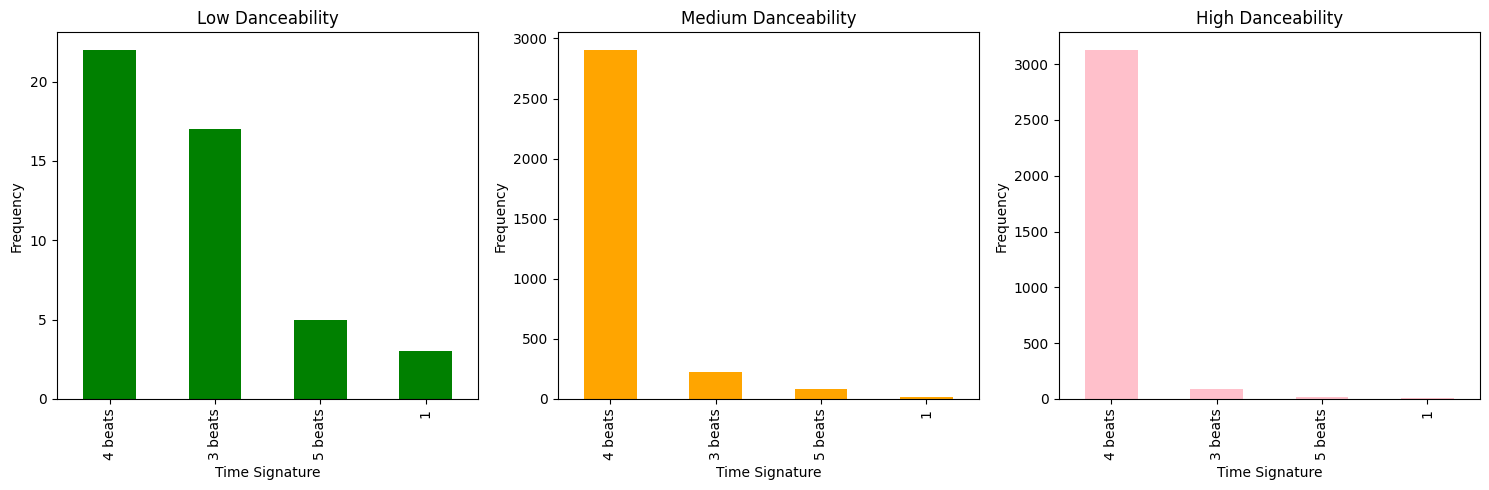

In [ ]:
# Divide into 3 subgroups based on 'danceability'
low_danceability = df[df['danceability'] < 0.3]
medium_danceability = df[(df['danceability'] >= 0.3) & (df['danceability'] < 0.7)]
high_danceability = df[df['danceability'] >= 0.7]

# Plot distributions for each subgroup
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
low_danceability['time_signature'].value_counts().plot(kind='bar', color='green')
plt.title('Low Danceability')
plt.xlabel('Time Signature')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
medium_danceability['time_signature'].value_counts().plot(kind='bar', color='orange')
plt.title('Medium Danceability')
plt.xlabel('Time Signature')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
high_danceability['time_signature'].value_counts().plot(kind='bar', color='pink')
plt.title('High Danceability')
plt.xlabel('Time Signature')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

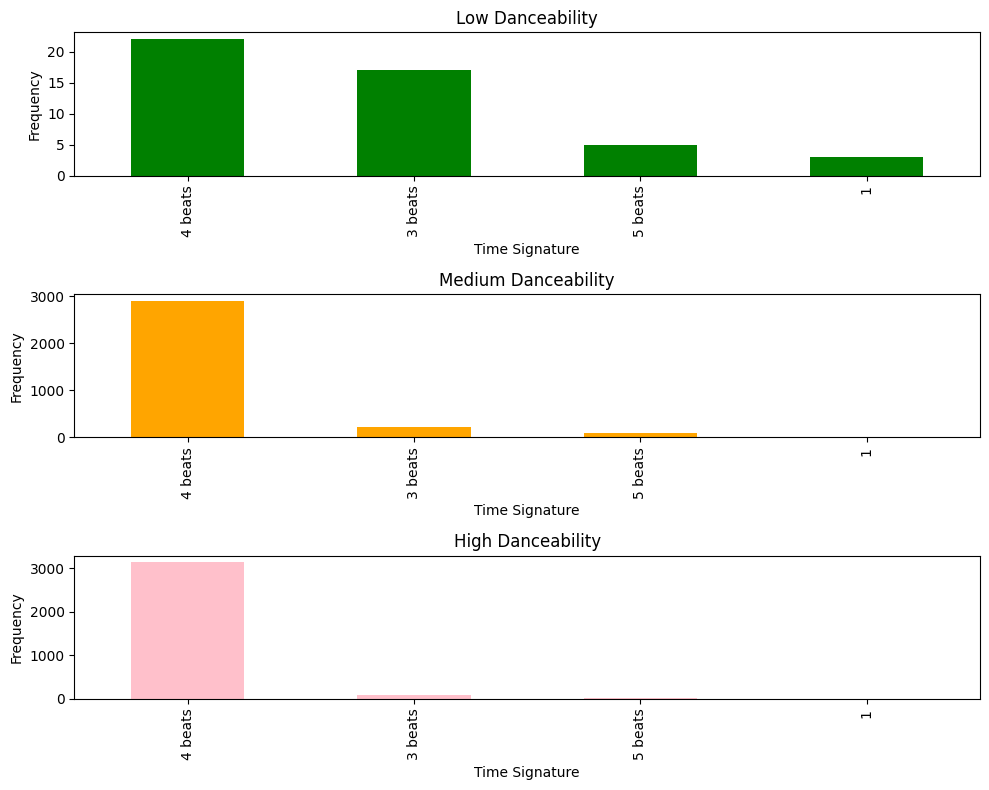

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
low_danceability['time_signature'].value_counts().plot(kind='bar', color='green')
plt.title('Low Danceability')
plt.xlabel('Time Signature')
plt.ylabel('Frequency')

plt.subplot(3, 1, 2)
medium_danceability['time_signature'].value_counts().plot(kind='bar', color='orange')
plt.title('Medium Danceability')
plt.xlabel('Time Signature')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
high_danceability['time_signature'].value_counts().plot(kind='bar', color='pink')
plt.title('High Danceability')
plt.xlabel('Time Signature')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

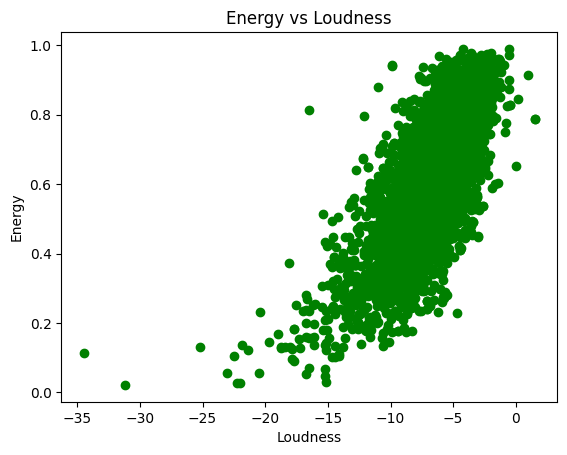

In [ ]:
# Plot a scatter plot showing the relationship between 'energy' and 'loudness'
plt.scatter(df['loudness'], df['energy'], color='green')
plt.title('Energy vs Loudness')
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.show()



Text(0, 0.5, 'Tempo (BPM)')

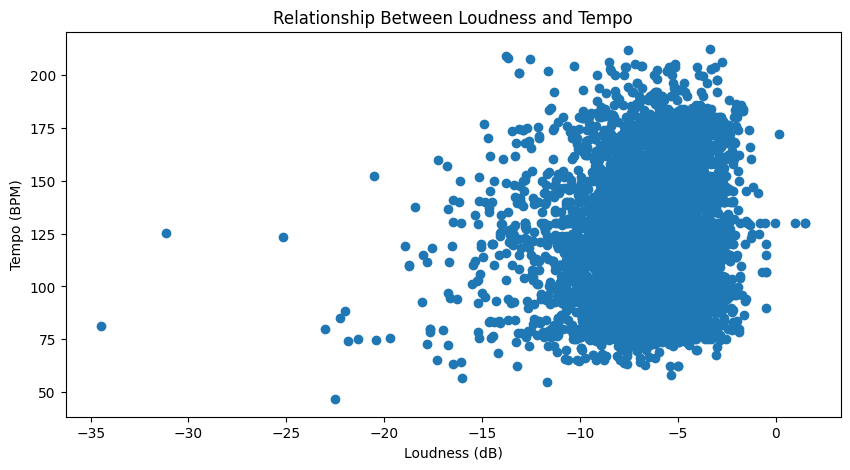

In [ ]:
# Scatter plot showing the relationship between 'loudness' and 'tempo'
plt.figure(figsize=(10, 5))
plt.scatter(df['loudness'], df['tempo'])
plt.title('Relationship Between Loudness and Tempo')
plt.xlabel('Loudness (dB)')
plt.ylabel('Tempo (BPM)')

Text(100, 0.5, 'Sample Annotation')

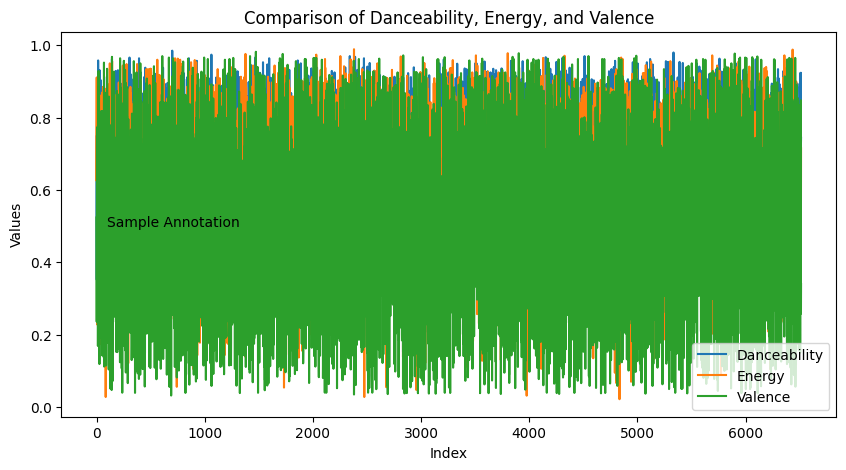

In [ ]:
# Multi-line graph comparing 'danceability', 'energy', and 'valence'
plt.figure(figsize=(10, 5))
plt.plot(df['danceability'], label='Danceability')
plt.plot(df['energy'], label='Energy')
plt.plot(df['valence'], label='Valence')
plt.title('Comparison of Danceability, Energy, and Valence')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.text(100, 0.5, 'Sample Annotation')

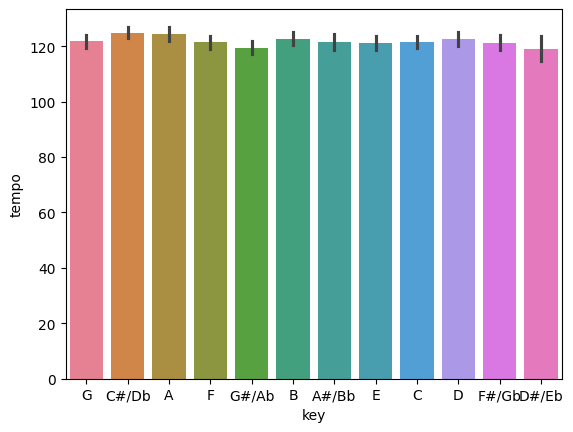

In [ ]:
# Setting the dataframe index to a categorical column 'mode' and display a bar plot of the numerical column 'energy'
# plt.figure(figsize=(20, 8))
# df.set_index('mode')['energy'].plot(kind='bar', color='brown')
# df.set_index('key')['energy'].plot(kind='bar', color=df['mode'].map({'Major': 'brown', 'Minor': 'grey'}))
# plt.title('Energy by Mode')
# plt.xlabel('Mode')
# plt.ylabel('Energy')
# plt.xticks(rotation=60)
# plt.show()
colors = ['red', 'green', 'blue', 'orange', 'purple']
mdf_ind = df.set_index('key')

# sns.barplot(x=mdf_ind.index, y=mdf_ind['tempo'], palette=colors)
sns.barplot(x=mdf_ind.index, y=mdf_ind['tempo'], hue=mdf_ind.index)
plt.show()

In [ ]:
df

,id,artist_names,track_name,source,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams,danceability_group
key,,,,,,,,,,,,,,,,,,,
G,000xQL6tZNLJzIrtIgxqSl,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,Major,4 beats,0.748,0.627,0.0639,0.13100,0.000000,0.0852,0.524,-6.029,120.963,188491,17,107527761,Group 3: >= 0.7
C#/Db,003eoIwxETJujVWmNFMoZy,Alessia Cara,Growing Pains,Def Jam Recordings,Minor,4 beats,0.353,0.755,0.7330,0.08220,0.000000,0.3900,0.437,-6.276,191.153,193680,2,9944865,Group 1: < 0.5
C#/Db,003vvx7Niy0yvhvHt4a68B,The Killers,Mr. Brightside,Island Records,Major,4 beats,0.352,0.911,0.0747,0.00121,0.000000,0.0995,0.236,-5.230,148.033,222973,125,512388123,Group 1: < 0.5
A,00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),Atlantic/KSR,Major,4 beats,0.620,0.625,0.5530,0.28700,0.000000,0.3140,0.665,-7.438,167.911,284856,2,11985346,Group 2: 0.5-0.7
C#/Db,00Blm7zeNqgYLPtW6zg8cj,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,Major,4 beats,0.687,0.781,0.0530,0.03610,0.000000,0.0755,0.688,-4.806,97.014,193507,30,301860377,Group 2: 0.5-0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D,7zgqtptZvhf8GEmdsM2vp2,Taylor Swift,...Ready For It?,"Big Machine Records, LLC",Major,4 beats,0.615,0.779,0.1350,0.06650,0.000000,0.1550,0.453,-6.454,160.000,208198,1,17583532,Group 2: 0.5-0.7
G,7zjEyeBsaw9gV0jofJLfOM,"Young Thug, A$AP Rocky, Post Malone",Livin It Up (with Post Malone & A$AP Rocky),300 Entertainment/Atl,Major,4 beats,0.767,0.313,0.0798,0.83800,0.000000,0.1050,0.765,-12.059,82.582,210907,2,10526635,Group 3: >= 0.7
B,7zl7kehxesNEo2pYkKXTSe,"Eminem, Jack Harlow, Cordae",Killer (feat. Jack Harlow & Cordae) - Remix,Shady/Aftermath/Interscope Records,Minor,4 beats,0.924,0.730,0.2740,0.05250,0.000000,0.1130,0.848,-6.125,99.010,236666,1,5404939,Group 3: >= 0.7


In [ ]:
# # Setting the dataframe index to a categorical column 'mode' and display a bar plot of the numerical column 'energy'
# plt.figure(figsize=(10, 8))
# df.sort_index()['energy'].plot(kind='bar', color='brown')
# plt.title('Energy by key')
# plt.xlabel('key')
# plt.ylabel('Energy')
# plt.xticks(rotation=120)
# plt.show()

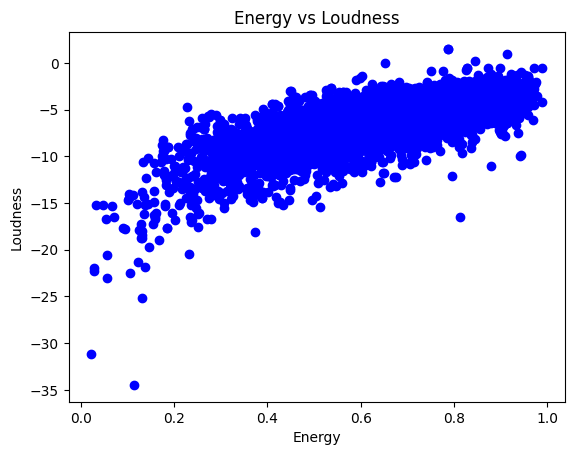

In [ ]:
# Saving the scatter plot as a PNG file
plt.scatter(df['energy'], df['loudness'], color='blue')
plt.title('Energy vs Loudness')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.savefig('energy_vs_loudness.png')
plt.show()

# ***Stage-4***

Merge and cancat

In [ ]:
# Splitting the dataset Vertically into two subsets:
# Selecting the columns for the first subset

subset1 = df[['artist_names','id','mode','track_name','source',]]
subset1


,artist_names,id,mode,track_name,source
0,"ZAYN, PARTYNEXTDOOR",000xQL6tZNLJzIrtIgxqSl,Major,Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label
1,Alessia Cara,003eoIwxETJujVWmNFMoZy,Minor,Growing Pains,Def Jam Recordings
2,The Killers,003vvx7Niy0yvhvHt4a68B,Major,Mr. Brightside,Island Records
3,"Cardi B, Chance the Rapper",00B7TZ0Xawar6NZ00JFomN,Major,Best Life (feat. Chance The Rapper),Atlantic/KSR
4,"Post Malone, The Weeknd",00Blm7zeNqgYLPtW6zg8cj,Major,One Right Now (with The Weeknd),Republic Records
...,...,...,...,...,...
6508,Taylor Swift,7zgqtptZvhf8GEmdsM2vp2,Major,...Ready For It?,"Big Machine Records, LLC"
6509,"Young Thug, A$AP Rocky, Post Malone",7zjEyeBsaw9gV0jofJLfOM,Major,Livin It Up (with Post Malone & A$AP Rocky),300 Entertainment/Atl
6510,"Eminem, Jack Harlow, Cordae",7zl7kehxesNEo2pYkKXTSe,Minor,Killer (feat. Jack Harlow & Cordae) - Remix,Shady/Aftermath/Interscope Records
6511,"Kendrick Lamar, Tanna Leone",7zvfDihYiJ8RQ1nRcpKBF5,Major,Mr. Morale,pgLang/Top Dawg Entertainment/Aftermath/Inters...


In [ ]:
# Selecting different set of columns for the second subset

subset2 = df[['id','key','mode','time_signature','danceability','energy','tempo','weeks_on_chart']]
subset2

,id,key,mode,time_signature,danceability,energy,tempo,weeks_on_chart
0,000xQL6tZNLJzIrtIgxqSl,G,Major,4 beats,0.748,0.627,120.963,17
1,003eoIwxETJujVWmNFMoZy,C#/Db,Minor,4 beats,0.353,0.755,191.153,2
2,003vvx7Niy0yvhvHt4a68B,C#/Db,Major,4 beats,0.352,0.911,148.033,125
3,00B7TZ0Xawar6NZ00JFomN,A,Major,4 beats,0.620,0.625,167.911,2
4,00Blm7zeNqgYLPtW6zg8cj,C#/Db,Major,4 beats,0.687,0.781,97.014,30
...,...,...,...,...,...,...,...,...
6508,7zgqtptZvhf8GEmdsM2vp2,D,Major,4 beats,0.615,0.779,160.000,1
6509,7zjEyeBsaw9gV0jofJLfOM,G,Major,4 beats,0.767,0.313,82.582,2
6510,7zl7kehxesNEo2pYkKXTSe,B,Minor,4 beats,0.924,0.730,99.010,1
6511,7zvfDihYiJ8RQ1nRcpKBF5,A,Major,3 beats,0.727,0.530,174.025,1


In [ ]:
#Deleting row from subset1 where 'source' is 'Def Jam Recording'
subset1 = subset1[subset1['source'] != 'Def Jam Recordings']
subset1

,artist_names,id,mode,track_name,source
0,"ZAYN, PARTYNEXTDOOR",000xQL6tZNLJzIrtIgxqSl,Major,Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label
2,The Killers,003vvx7Niy0yvhvHt4a68B,Major,Mr. Brightside,Island Records
3,"Cardi B, Chance the Rapper",00B7TZ0Xawar6NZ00JFomN,Major,Best Life (feat. Chance The Rapper),Atlantic/KSR
4,"Post Malone, The Weeknd",00Blm7zeNqgYLPtW6zg8cj,Major,One Right Now (with The Weeknd),Republic Records
5,"Thalia, NATTI NATASHA",00EPIEnX1JFjff8sC6bccd,Minor,No Me Acuerdo,Sony Music Latin
...,...,...,...,...,...
6508,Taylor Swift,7zgqtptZvhf8GEmdsM2vp2,Major,...Ready For It?,"Big Machine Records, LLC"
6509,"Young Thug, A$AP Rocky, Post Malone",7zjEyeBsaw9gV0jofJLfOM,Major,Livin It Up (with Post Malone & A$AP Rocky),300 Entertainment/Atl
6510,"Eminem, Jack Harlow, Cordae",7zl7kehxesNEo2pYkKXTSe,Minor,Killer (feat. Jack Harlow & Cordae) - Remix,Shady/Aftermath/Interscope Records
6511,"Kendrick Lamar, Tanna Leone",7zvfDihYiJ8RQ1nRcpKBF5,Major,Mr. Morale,pgLang/Top Dawg Entertainment/Aftermath/Inters...


In [ ]:
#Recombine using pd.concat(...,axis = 1)

# Recombing the subset
combined_df = pd.concat([subset1.set_index('id'), subset2.set_index('id')], axis = 1)
combined_df

,artist_names,mode,track_name,source,key,mode,time_signature,danceability,energy,tempo,weeks_on_chart
id,,,,,,,,,,,
000xQL6tZNLJzIrtIgxqSl,"ZAYN, PARTYNEXTDOOR",Major,Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,120.963,17
003vvx7Niy0yvhvHt4a68B,The Killers,Major,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,148.033,125
00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",Major,Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,167.911,2
00Blm7zeNqgYLPtW6zg8cj,"Post Malone, The Weeknd",Major,One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,97.014,30
00EPIEnX1JFjff8sC6bccd,"Thalia, NATTI NATASHA",Minor,No Me Acuerdo,Sony Music Latin,G,Minor,4 beats,0.836,0.799,94.033,16
...,...,...,...,...,...,...,...,...,...,...,...
7zgqtptZvhf8GEmdsM2vp2,Taylor Swift,Major,...Ready For It?,"Big Machine Records, LLC",D,Major,4 beats,0.615,0.779,160.000,1
7zjEyeBsaw9gV0jofJLfOM,"Young Thug, A$AP Rocky, Post Malone",Major,Livin It Up (with Post Malone & A$AP Rocky),300 Entertainment/Atl,G,Major,4 beats,0.767,0.313,82.582,2
7zl7kehxesNEo2pYkKXTSe,"Eminem, Jack Harlow, Cordae",Minor,Killer (feat. Jack Harlow & Cordae) - Remix,Shady/Aftermath/Interscope Records,B,Minor,4 beats,0.924,0.730,99.010,1


In [ ]:
#Recombining using pd.merge()

# Recombining using the 'id' column
merged_df = pd.merge(subset1, subset2, on='id')
merged_df




,artist_names,id,mode_x,track_name,source,key,mode_y,time_signature,danceability,energy,tempo,weeks_on_chart
0,"ZAYN, PARTYNEXTDOOR",000xQL6tZNLJzIrtIgxqSl,Major,Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,120.963,17
1,The Killers,003vvx7Niy0yvhvHt4a68B,Major,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,148.033,125
2,"Cardi B, Chance the Rapper",00B7TZ0Xawar6NZ00JFomN,Major,Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,167.911,2
3,"Post Malone, The Weeknd",00Blm7zeNqgYLPtW6zg8cj,Major,One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,97.014,30
4,"Thalia, NATTI NATASHA",00EPIEnX1JFjff8sC6bccd,Minor,No Me Acuerdo,Sony Music Latin,G,Minor,4 beats,0.836,0.799,94.033,16
...,...,...,...,...,...,...,...,...,...,...,...,...
6452,Taylor Swift,7zgqtptZvhf8GEmdsM2vp2,Major,...Ready For It?,"Big Machine Records, LLC",D,Major,4 beats,0.615,0.779,160.000,1
6453,"Young Thug, A$AP Rocky, Post Malone",7zjEyeBsaw9gV0jofJLfOM,Major,Livin It Up (with Post Malone & A$AP Rocky),300 Entertainment/Atl,G,Major,4 beats,0.767,0.313,82.582,2
6454,"Eminem, Jack Harlow, Cordae",7zl7kehxesNEo2pYkKXTSe,Minor,Killer (feat. Jack Harlow & Cordae) - Remix,Shady/Aftermath/Interscope Records,B,Minor,4 beats,0.924,0.730,99.010,1
6455,"Kendrick Lamar, Tanna Leone",7zvfDihYiJ8RQ1nRcpKBF5,Major,Mr. Morale,pgLang/Top Dawg Entertainment/Aftermath/Inters...,A,Major,3 beats,0.727,0.530,174.025,1


In [ ]:
# Recombine using the index (if 'id' is set as the index)
merged_df_index = pd.merge(subset1.set_index('id'), subset2.set_index('id'), left_index=True, right_index=True)
merged_df_index

,artist_names,mode_x,track_name,source,key,mode_y,time_signature,danceability,energy,tempo,weeks_on_chart
id,,,,,,,,,,,
000xQL6tZNLJzIrtIgxqSl,"ZAYN, PARTYNEXTDOOR",Major,Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,120.963,17
003vvx7Niy0yvhvHt4a68B,The Killers,Major,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,148.033,125
00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",Major,Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,167.911,2
00Blm7zeNqgYLPtW6zg8cj,"Post Malone, The Weeknd",Major,One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,97.014,30
00EPIEnX1JFjff8sC6bccd,"Thalia, NATTI NATASHA",Minor,No Me Acuerdo,Sony Music Latin,G,Minor,4 beats,0.836,0.799,94.033,16
...,...,...,...,...,...,...,...,...,...,...,...
7zgqtptZvhf8GEmdsM2vp2,Taylor Swift,Major,...Ready For It?,"Big Machine Records, LLC",D,Major,4 beats,0.615,0.779,160.000,1
7zjEyeBsaw9gV0jofJLfOM,"Young Thug, A$AP Rocky, Post Malone",Major,Livin It Up (with Post Malone & A$AP Rocky),300 Entertainment/Atl,G,Major,4 beats,0.767,0.313,82.582,2
7zl7kehxesNEo2pYkKXTSe,"Eminem, Jack Harlow, Cordae",Minor,Killer (feat. Jack Harlow & Cordae) - Remix,Shady/Aftermath/Interscope Records,B,Minor,4 beats,0.924,0.730,99.010,1


In [ ]:
# Assigning different values for the how= parameter:

#Using 'inner' join
merged_inner = pd.merge(subset1, subset2, on='id', how='inner')
merged_inner


,artist_names,id,mode_x,track_name,source,key,mode_y,time_signature,danceability,energy,tempo,weeks_on_chart
0,"ZAYN, PARTYNEXTDOOR",000xQL6tZNLJzIrtIgxqSl,Major,Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,120.963,17
1,The Killers,003vvx7Niy0yvhvHt4a68B,Major,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,148.033,125
2,"Cardi B, Chance the Rapper",00B7TZ0Xawar6NZ00JFomN,Major,Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,167.911,2
3,"Post Malone, The Weeknd",00Blm7zeNqgYLPtW6zg8cj,Major,One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,97.014,30
4,"Thalia, NATTI NATASHA",00EPIEnX1JFjff8sC6bccd,Minor,No Me Acuerdo,Sony Music Latin,G,Minor,4 beats,0.836,0.799,94.033,16
...,...,...,...,...,...,...,...,...,...,...,...,...
6452,Taylor Swift,7zgqtptZvhf8GEmdsM2vp2,Major,...Ready For It?,"Big Machine Records, LLC",D,Major,4 beats,0.615,0.779,160.000,1
6453,"Young Thug, A$AP Rocky, Post Malone",7zjEyeBsaw9gV0jofJLfOM,Major,Livin It Up (with Post Malone & A$AP Rocky),300 Entertainment/Atl,G,Major,4 beats,0.767,0.313,82.582,2
6454,"Eminem, Jack Harlow, Cordae",7zl7kehxesNEo2pYkKXTSe,Minor,Killer (feat. Jack Harlow & Cordae) - Remix,Shady/Aftermath/Interscope Records,B,Minor,4 beats,0.924,0.730,99.010,1
6455,"Kendrick Lamar, Tanna Leone",7zvfDihYiJ8RQ1nRcpKBF5,Major,Mr. Morale,pgLang/Top Dawg Entertainment/Aftermath/Inters...,A,Major,3 beats,0.727,0.530,174.025,1


The inner join will result in a DataFrame that only includes rows with matching ‘id’ values in both subsets. Rows with ‘id’ values that do not match are excluded.

In [ ]:
# Using 'outer' join
merged_outer = pd.merge(subset1, subset2, on='id', how='outer')
merged_outer

,artist_names,id,mode_x,track_name,source,key,mode_y,time_signature,danceability,energy,tempo,weeks_on_chart
0,"ZAYN, PARTYNEXTDOOR",000xQL6tZNLJzIrtIgxqSl,Major,Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,120.963,17
1,The Killers,003vvx7Niy0yvhvHt4a68B,Major,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,148.033,125
2,"Cardi B, Chance the Rapper",00B7TZ0Xawar6NZ00JFomN,Major,Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,167.911,2
3,"Post Malone, The Weeknd",00Blm7zeNqgYLPtW6zg8cj,Major,One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,97.014,30
4,"Thalia, NATTI NATASHA",00EPIEnX1JFjff8sC6bccd,Minor,No Me Acuerdo,Sony Music Latin,G,Minor,4 beats,0.836,0.799,94.033,16
...,...,...,...,...,...,...,...,...,...,...,...,...
6508,NaN,7M2tXmeS15NAzEn7ABFeBg,NaN,NaN,NaN,A#/Bb,Minor,4 beats,0.694,0.759,140.055,12
6509,NaN,7cGFbx7MP0H23iHZTZpqMM,NaN,NaN,NaN,C#/Db,Major,4 beats,0.885,0.940,110.005,7
6510,NaN,7fRfIvHPH6bHdMDjPFwTMh,NaN,NaN,NaN,B,Minor,4 beats,0.674,0.596,136.059,1
6511,NaN,7u90MSvVyEjL0c8icaE7jl,NaN,NaN,NaN,G#/Ab,Major,4 beats,0.804,0.823,126.007,3


The outer join will result in a DataFrame that includes all rows from both subsets. If an ‘id’ value from one subset does not have a corresponding row in the other subset, the resulting DataFrame will have NaN values for the missing columns.

**Pivot Table and Crosstab**

In this pivot table, the rows are indexed by a combination of ‘key’ and ‘mode’, the columns represent ‘time_signature’, and the values are the average danceability.

In [ ]:
# Replicating Hierarchical Indexing with .pivot_table():
pivot_table = df.pivot_table(index=['key', 'mode'], columns='time_signature', values='danceability')
pivot_table

time_signature         1   3 beats   4 beats   5 beats
key   mode                                            
A     Major          NaN  0.583000  0.669198  0.487250
      Minor          NaN  0.575500  0.683298  0.590800
A#/Bb Major          NaN  0.455437  0.647481  0.528750
      Minor          NaN  0.652800  0.727963  0.566714
B     Major          NaN  0.697286  0.708190  0.599500
      Minor          NaN  0.622636  0.717249  0.620833
C     Major     0.411000  0.561038  0.665282  0.539800
      Minor     0.413000  0.432571  0.684452  0.425000
C#/Db Major     0.629000  0.621500  0.711521  0.493400
      Minor     0.773000  0.544733  0.701673  0.506250
D     Major          NaN  0.617000  0.687765  0.530667
      Minor          NaN  0.586625  0.657253  0.625500
D#/Eb Major     0.294000  0.556400  0.598064  0.661000
      Minor          NaN  0.702000  0.704947       NaN
E     Major          NaN  0.554583  0.642102       NaN
      Minor     0.708000  0.488063  0.708226  0.432600
F     Major     0.348750  0.519923  0.662763  0.408000
      Minor     0.751000  0.609647  0.715080  0.519250
F#/Gb Major          NaN  0.383333  0.674867  0.506333
      Minor     0.687800  0.437833  0.707734  0.653400
G     Major     0.408333  0.525250  0.676783  0.558643
      Minor     0.507000  0.660000  0.709663  0.598600
G#/Ab Major     0.388000  0.558815  0.688719  0.578000
      Minor     0.405000  0.541750  0.725007       NaN

Basically, the margin=True parameter adds a row and a column at the end of the pivot table that shows the mean danceability for all combinations of ‘key’, ‘mode’, and ‘time_signature

In [ ]:
# adding margins=True Parameter:

pivot_table_with_margins = df.pivot_table(index=['key', 'mode'], columns='time_signature', values='danceability', margins=True)
pivot_table_with_margins

time_signature         1   3 beats   4 beats   5 beats       All
key   mode                                                      
A     Major          NaN  0.583000  0.669198  0.487250  0.662007
      Minor          NaN  0.575500  0.683298  0.590800  0.672523
A#/Bb Major          NaN  0.455437  0.647481  0.528750  0.627989
      Minor          NaN  0.652800  0.727963  0.566714  0.722647
B     Major          NaN  0.697286  0.708190  0.599500  0.704770
      Minor          NaN  0.622636  0.717249  0.620833  0.712675
C     Major     0.411000  0.561038  0.665282  0.539800  0.658491
      Minor     0.413000  0.432571  0.684452  0.425000  0.669943
C#/Db Major     0.629000  0.621500  0.711521  0.493400  0.704045
      Minor     0.773000  0.544733  0.701673  0.506250  0.691762
D     Major          NaN  0.617000  0.687765  0.530667  0.683901
      Minor          NaN  0.586625  0.657253  0.625500  0.651486
D#/Eb Major     0.294000  0.556400  0.598064  0.661000  0.589302
      Minor          NaN  0.702000  0.704947       NaN  0.704917
E     Major          NaN  0.554583  0.642102       NaN  0.635497
      Minor     0.708000  0.488063  0.708226  0.432600  0.689732
F     Major     0.348750  0.519923  0.662763  0.408000  0.647282
      Minor     0.751000  0.609647  0.715080  0.519250  0.706529
F#/Gb Major          NaN  0.383333  0.674867  0.506333  0.668507
      Minor     0.687800  0.437833  0.707734  0.653400  0.699768
G     Major     0.408333  0.525250  0.676783  0.558643  0.661031
      Minor     0.507000  0.660000  0.709663  0.598600  0.701721
G#/Ab Major     0.388000  0.558815  0.688719  0.578000  0.677178
      Minor     0.405000  0.541750  0.725007       NaN  0.713020
All             0.511720  0.564954  0.690960  0.552636  0.681731

The aggfunc='sum' computes the total sum of danceability values for each combination of ‘key’, ‘mode’, and ‘time_signature’.

In [ ]:
#Embedding summary Method with aggfunc=:

pivot_table_aggfunc = df.pivot_table(index=['key', 'mode'], columns='time_signature', values='danceability', aggfunc='sum')
pivot_table_aggfunc

time_signature      1  3 beats  4 beats  5 beats
key   mode                                      
A     Major       NaN    8.745  175.330    1.949
      Minor       NaN   11.510  148.959    2.954
A#/Bb Major       NaN    7.287  104.892    2.115
      Minor       NaN    3.264  197.278    3.967
B     Major       NaN    4.881  141.638    3.597
      Minor       NaN    6.849  241.713    3.725
C     Major     0.411   14.587  330.645    2.699
      Minor     0.413    3.028  113.619    0.850
C#/Db Major     0.629   17.402  427.624    4.934
      Minor     1.546    8.171  197.170    2.025
D     Major       NaN    9.872  272.355    1.592
      Minor       NaN    4.693   65.068    1.251
D#/Eb Major     0.588    2.782   46.649    0.661
      Minor       NaN    0.702   66.970      NaN
E     Major       NaN    6.655   94.389      NaN
      Minor     0.708    7.809  172.099    2.163
F     Major     1.395    6.759  142.494    0.816
      Minor     0.751   10.364  196.647    2.077
F#/Gb Major       NaN    1.150  142.397    1.519
      Minor     3.439    2.627  186.134    6.534
G     Major     1.225   12.606  234.167    7.821
      Minor     0.507   11.880  130.578    2.993
G#/Ab Major     0.776   15.088  254.826    2.890
      Minor     0.405    4.334  101.501      NaN

The pd.crosstab() function computes a frequency table (cross-tabulation) of the counts of unique combinations of values between ‘key’ and ‘mode’. It shows how many times each combination occurs.

In [ ]:
# Computing Output of pd.crosstab():
# crosstab_output = pd.crosstab(df['key'], df['mode'])
crosstab_output = pd.crosstab(df['key'], df['mode'])
crosstab_output


mode,Major,Minor
key,,
A,281,243
A#/Bb,182,283
B,213,354
C,529,176
C#/Db,640,302
D,415,109
D#/Eb,86,96
E,159,265
F,234,297



The heatmap visually representing the counts from the crosstab output. Each cell shows the count of occurrences of a specific combination of values from ‘mode’ and ‘key’. The color intensity indicates the count, and the annotations display the actual counts.

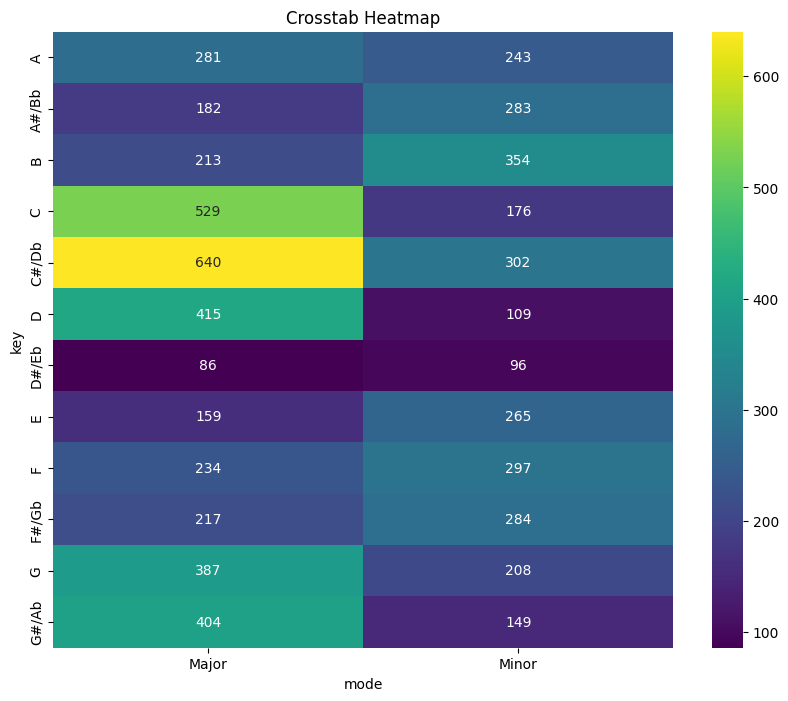

In [ ]:
#Creating a Seaborn Heatmap from Crosstab Output:
plt.figure(figsize=(10, 8))
sns.heatmap(crosstab_output, annot=True, fmt='d', cmap='viridis')
plt.title('Crosstab Heatmap')
plt.xlabel('mode')
plt.ylabel('key')
plt.show()
